# Nutrition tables cropping and nutrition facts extraction
https://github.com/openfoodfacts/openfoodfacts-ai/blob/develop/data-sets.md

In [2]:
# importing prerequisites
import sys
import requests
import tarfile
import json
import numpy as np
from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw
from glob import glob

# Visualization
from matplotlib import pyplot as plt
%matplotlib inline
from pprint import pprint
#import yaml
from tools import explore_image
from constants import sample_img_ids_v0

In [3]:
%load_ext autoreload
%autoreload 2

# setting path
sys.path.append('../../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Download and Extract the Dataset
France - French products (20k)
A set of 20k French products with:

original image containing a nutrition facts table
3596710454181.nutrition.jpg
rotation angle and bouding box coordinates of the cropped nutrition facts table
in the products.csv file
cropped image of the nutritions facts table
3596710454181.nutrition.cropped.jpg
Google Cloud Vision resulting json file for the cropped image
3596710454181.nutrition.cropped.jpg.json
Nutrition values as entered by users in the OFF database
3596710454181.nutriments.json
Location: https://static.openfoodfacts.org/exports/nutrition-lc-fr-country-fr-last-edit-date-2019-08.tar.gz (16.9 Gb)

Command used to generate the test set: ./extract_nutrition_test_set.pl --lc fr --query countries_tags=en:france --query last_edit_dates_tags=2019-08 --dir /srv/off/html/exports/nutrition-lc-fr-country-fr-last-edit-date-2019-08

Source: https://github.com/openfoodfacts/openfoodfacts-ai/blob/develop/data-sets.md

In [4]:
path = '../data/openfoodfacts/french_nutrition/nutrition-lc-fr-country-fr-last-edit-date-2019-08/'

In [5]:
# # Extracting the dataset
# tar = tarfile.open(drive_fname_path)
# tar.extractall(drive_path)
# tar.close()

## Visualizing the Data
In this section, we visualize the raw image and extract it's HTML annotation from the JSON file. We further render the table using Jupyter notebook's inbuilt HTML capabilities.

image id: 000000001576


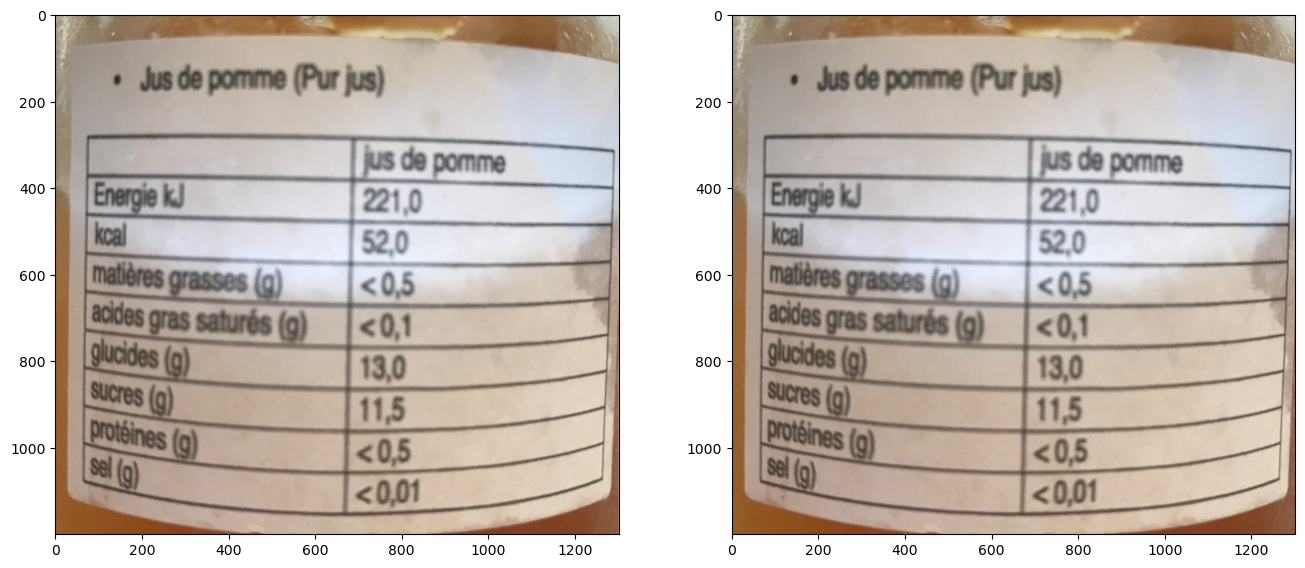

{'proteins_100g': 0.5, 'fat': 0.5, 'salt_100g': 0.01, 'carbohydrates_value': 0.01, 'saturated-fat_100g': 0.1, 'sodium_unit': 'g', 'proteins': 0.5, 'sodium_value': 0.004, 'sugars': 0.01, 'sodium_100g': 0.004, 'salt_unit': 'g', 'sugars_value': 0.01, 'salt_value': 0.01, 'fat_value': 0.5, 'sodium': 0.004, 'salt': 0.01, 'fat_unit': 'g', 'fat_100g': 0.5, 'carbohydrates_unit': 'g', 'carbohydrates_100g': 0.01, 'proteins_value': 0.5, 'saturated-fat_value': 0.1, 'proteins_unit': 'g', 'energy_value': 221, 'carbohydrates': 0.01, 'saturated-fat_unit': 'g', 'sugars_100g': 0.01, 'energy_unit': 'kcal', 'sugars_unit': 'g', 'energy_100g': 925, 'saturated-fat': 0.1, 'energy': 925}
--------------------------------------------------
****************************************************************************************************


In [14]:
explore_image("000000001576", path) # 000000001576


image id 000000000429 not found.
image id: 000000001576


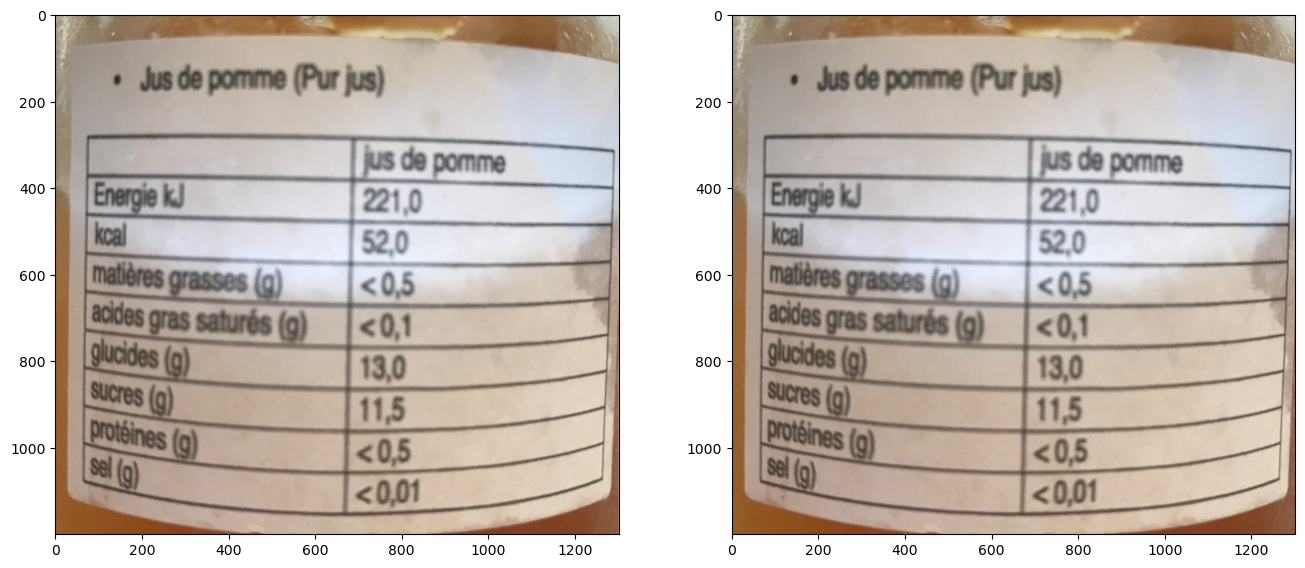

{'proteins_100g': 0.5, 'fat': 0.5, 'salt_100g': 0.01, 'carbohydrates_value': 0.01, 'saturated-fat_100g': 0.1, 'sodium_unit': 'g', 'proteins': 0.5, 'sodium_value': 0.004, 'sugars': 0.01, 'sodium_100g': 0.004, 'salt_unit': 'g', 'sugars_value': 0.01, 'salt_value': 0.01, 'fat_value': 0.5, 'sodium': 0.004, 'salt': 0.01, 'fat_unit': 'g', 'fat_100g': 0.5, 'carbohydrates_unit': 'g', 'carbohydrates_100g': 0.01, 'proteins_value': 0.5, 'saturated-fat_value': 0.1, 'proteins_unit': 'g', 'energy_value': 221, 'carbohydrates': 0.01, 'saturated-fat_unit': 'g', 'sugars_100g': 0.01, 'energy_unit': 'kcal', 'sugars_unit': 'g', 'energy_100g': 925, 'saturated-fat': 0.1, 'energy': 925}
--------------------------------------------------
****************************************************************************************************
image id 000000001756 not found.
image id 00000038 not found.
image id 0000183013125 not found.
image id 0000247016406 not found.
image id 00005333 not found.
image id 000069224

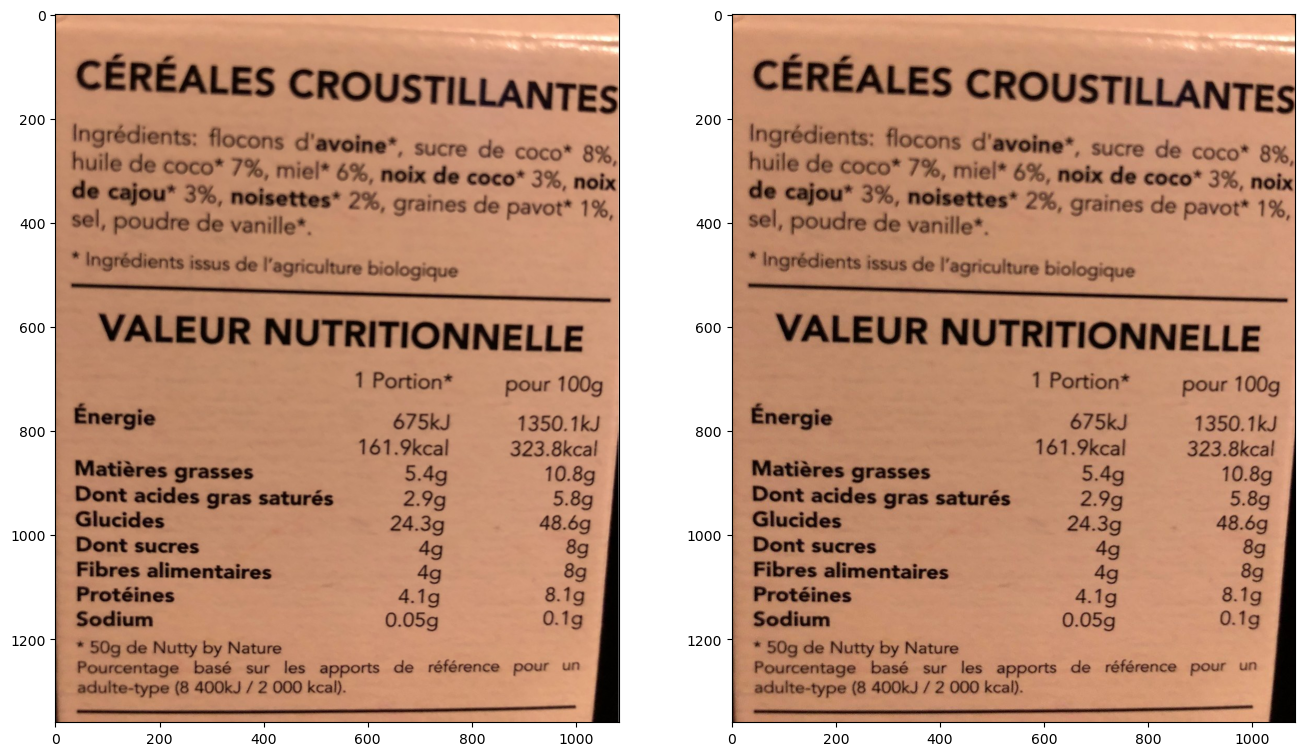

{'sugars_value': 8, 'salt_value': 0.1, 'fat_value': 10.8, 'sodium': 0.04, 'sodium_value': 0.04, 'sugars': 8, 'sodium_100g': 0.04, 'fiber_value': 8, 'salt_unit': '', 'carbohydrates_value': 48.6, 'saturated-fat_100g': 5.8, 'sodium_unit': 'g', 'fiber_unit': '', 'proteins': 8.1, 'proteins_100g': 8.1, 'carbon-footprint-from-known-ingredients_product': 3.15, 'fat': 10.8, 'salt_100g': 0.1, 'sugars_unit': '', 'energy_100g': 1351, 'saturated-fat': 5.8, 'fiber': 8, 'energy': 1351, 'carbohydrates': 48.6, 'saturated-fat_unit': '', 'sugars_100g': 8, 'energy_unit': 'kcal', 'proteins_value': 8.1, 'saturated-fat_value': 5.8, 'proteins_unit': '', 'energy_value': 323, 'fiber_100g': 8, 'salt': 0.1, 'fat_unit': '', 'fat_100g': 10.8, 'carbohydrates_unit': '', 'carbohydrates_100g': 48.6, 'carbon-footprint-from-known-ingredients_100g': 0.9}
--------------------------------------------------
****************************************************************************************************
image id 000200002

In [30]:
# Todo: Change list of ids because not all are found
total_displayed_images = 0

for img_id in sample_img_ids_v0[:]:
    try:
        explore_image(img_id, path)
        total_displayed_images += 1
    except:
        print(f"image id {img_id} not found.")
        continue

print("Total displayed images: %d" %total_displayed_images)